# House Prices: Advanced Regression Techniques
Author: Jingwen ZHENG<br>
Update: 2019-05-06

## Content
- Project understanding
- Objectif
- Practice skills
- Python packages to be applied
- Import data
- Data description

## Project understanding
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Objectif
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Practice skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

## Python packages to be applied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print('Dimension train_df:', train_df.shape)
print('Dimension test_df:', test_df.shape)

Dimension train_df: (1460, 81)
Dimension test_df: (1459, 80)


In [4]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## Data description

In [6]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Data cleaning

There are missing data in "LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence" and "MiscFeature".

Among these fields,
- 94% data of "Alley" are missing.
- 47% data of "FireplaceQu" are missing.
- 99.5% data of "PoolQC" are missing.
- 81% data of "Fence" are missing.
- 96% data of "MiscFeature" are missing.

So we will ignore them during the analysis.

What should we do on missing data of other fields? We might replace null by median value or mode value.

In [8]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['MasVnrType'].fillna('None', inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)
train_df['BsmtQual'].fillna('TA', inplace=True)
train_df['BsmtCond'].fillna('TA', inplace=True)
train_df['BsmtExposure'].fillna('No', inplace=True)
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
train_df['Electrical'].fillna('SBrkr', inplace=True)
train_df['GarageType'].fillna('Attchd', inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
train_df['GarageFinish'].fillna('Unf', inplace=True)
train_df['GarageQual'].fillna('TA', inplace=True)
train_df['GarageCond'].fillna('TA', inplace=True)

In [9]:
train_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
test_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [10]:
train_df.shape

(1460, 76)

In [11]:
test_df.shape

(1459, 75)

In [12]:
train_df['SalePrice_per_feet'] = train_df['SalePrice'] / train_df['LotArea']

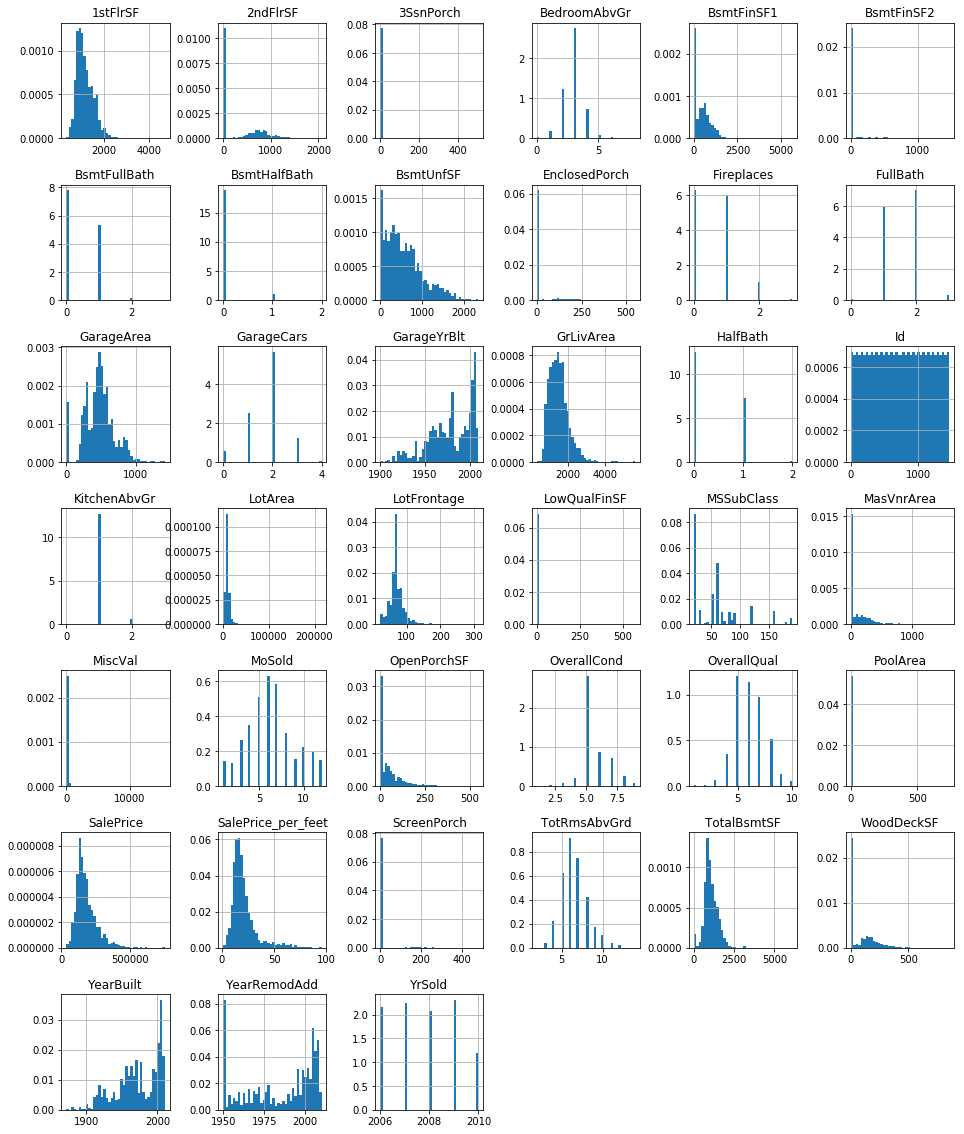

In [13]:
train_df.hist(bins=40, figsize=(16, 20), density=True)
plt.subplots_adjust(hspace=0.4, wspace=0.45)#, top=0.97, bottom=0.03, left=0.04, right=0.95)
plt.show()

According to the group of histograms, we observed that most "SalePrice" is between 130k dollars(1st quartile) and 214k dollars(3rd quartile).

## Data analysis

### Correlation matrix between numerical values and "SalePrice"

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id                    1460 non-null int64
MSSubClass            1460 non-null int64
MSZoning              1460 non-null object
LotFrontage           1460 non-null float64
LotArea               1460 non-null int64
Street                1460 non-null object
LotShape              1460 non-null object
LandContour           1460 non-null object
Utilities             1460 non-null object
LotConfig             1460 non-null object
LandSlope             1460 non-null object
Neighborhood          1460 non-null object
Condition1            1460 non-null object
Condition2            1460 non-null object
BldgType              1460 non-null object
HouseStyle            1460 non-null object
OverallQual           1460 non-null int64
OverallCond           1460 non-null int64
YearBuilt             1460 non-null int64
YearRemodAdd          1460 non-null int64
RoofStyle             1460 non-null obj

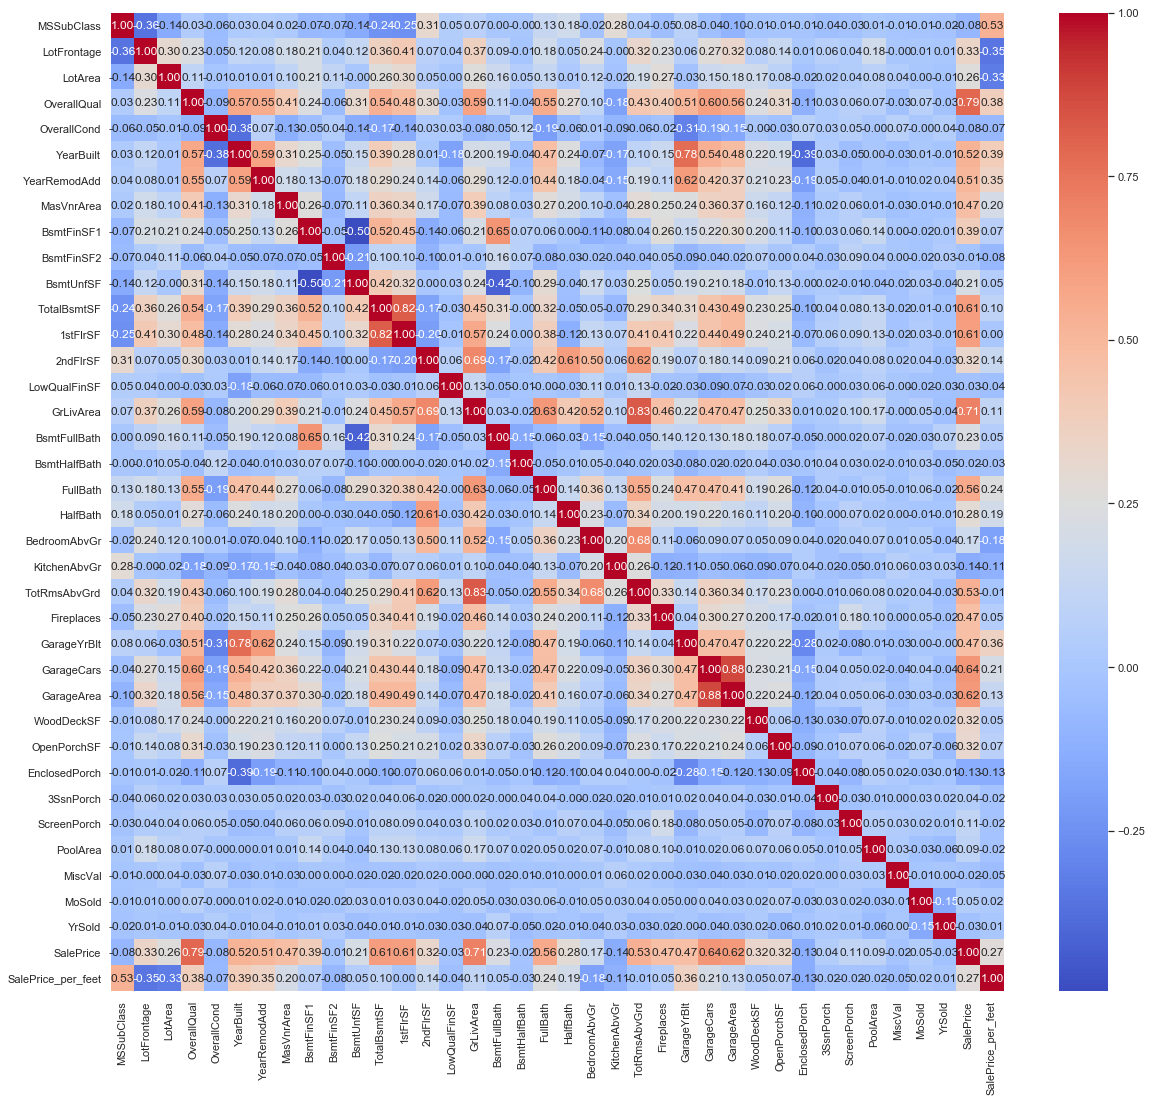

In [15]:
sns.set(rc={'figure.figsize':(20, 18)})
num_fields = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
              'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
              'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
              'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_per_feet']

sns.heatmap(train_df[num_fields].corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.show()

As the correlation heatmap shows, "SalePrice" is more related to "OverallQual", "GrLivArea" and "GarageCars".

### Relationship between "SalePrice" and numeric fields

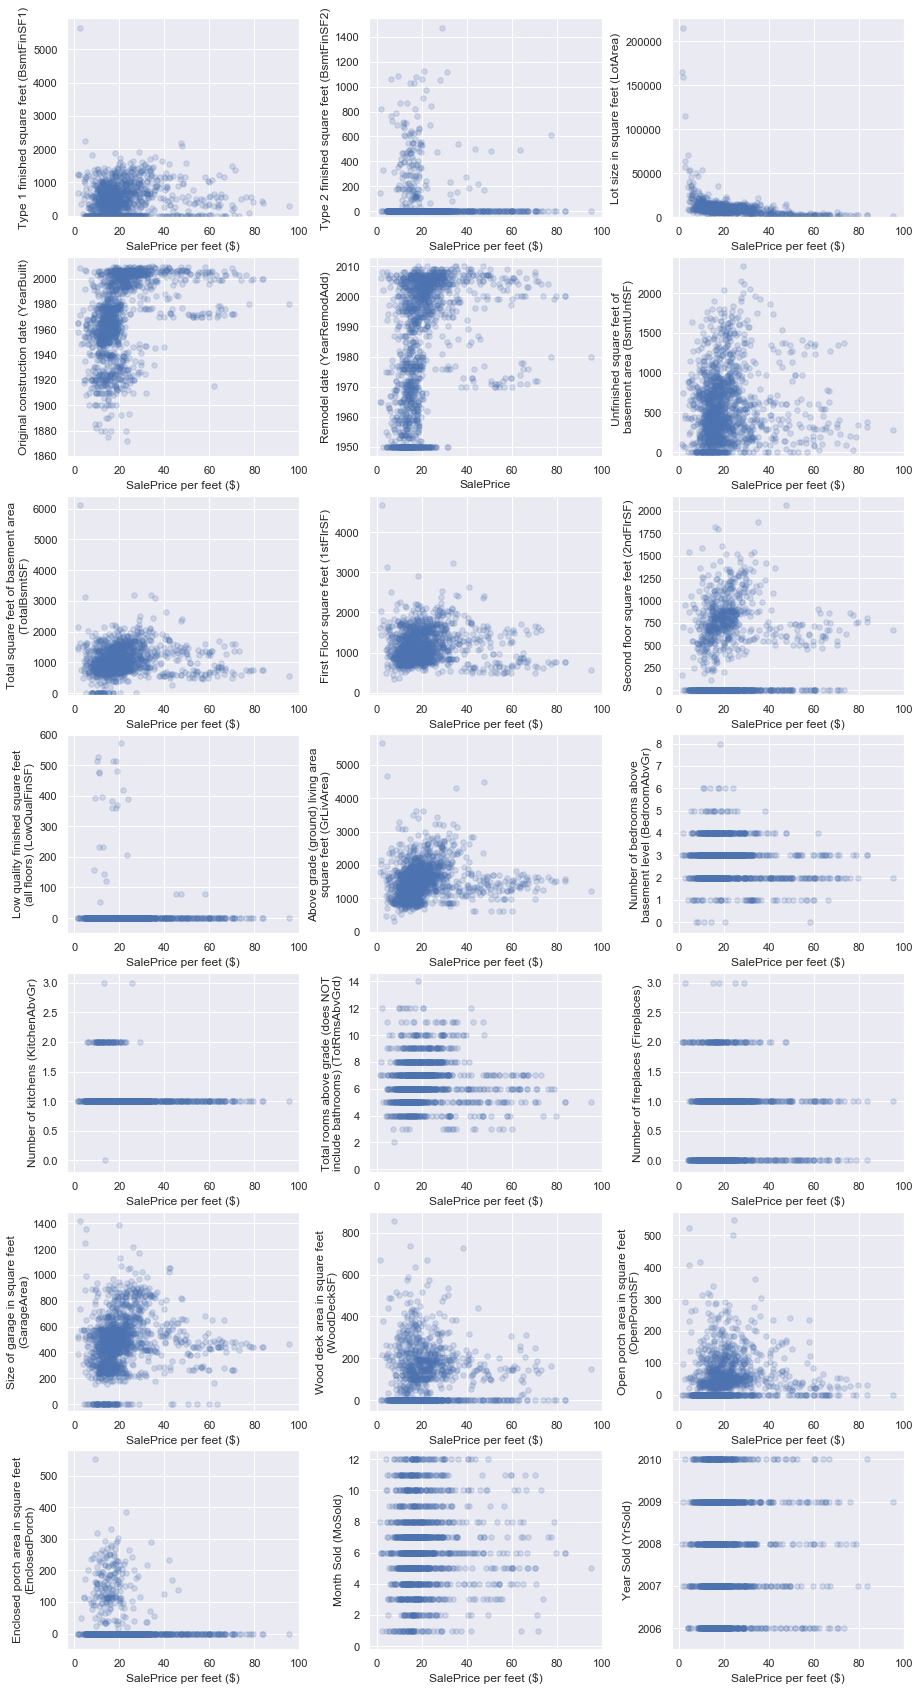

In [16]:
# plt.figure(figsize=(7, 7))
fig, axarr = plt.subplots(nrows=7, ncols=3, figsize=(15, 30))

axarr[0, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['BsmtFinSF1'],
                    s=30,
                    alpha=0.2)
axarr[0, 0].set_xlabel('SalePrice per feet ($)')
axarr[0, 0].set_ylabel('Type 1 finished square feet (BsmtFinSF1)')
axarr[0, 0].set_ylim(bottom=-50)#, top=2500)

axarr[0, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['BsmtFinSF2'],
                    s=30,
                    alpha=0.2)
axarr[0, 1].set_xlabel('SalePrice per feet ($)')
axarr[0, 1].set_ylabel('Type 2 finished square feet (BsmtFinSF2)')
axarr[0, 1].set_ylim(bottom=-50)#, top=2500)

axarr[0, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['LotArea'],
                    s=30,
                    alpha=0.2)
axarr[0, 2].set_xlabel('SalePrice per feet ($)')
axarr[0, 2].set_ylabel('Lot size in square feet (LotArea)')
axarr[0, 2].set_ylim(bottom=-50)#, top=50000)

axarr[1, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['YearBuilt'],
                    s=30,
                    alpha=0.2)
axarr[1, 0].set_xlabel('SalePrice per feet ($)')
axarr[1, 0].set_ylabel('Original construction date (YearBuilt)')
axarr[1, 0].set_ylim(bottom=1860)#, top=2500)

axarr[1, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['YearRemodAdd'],
                    s=30,
                    alpha=0.2)
axarr[1, 1].set_xlabel('SalePrice')
axarr[1, 1].set_ylabel('Remodel date (YearRemodAdd)')

axarr[1, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['BsmtUnfSF'],
                    s=30,
                    alpha=0.2)
axarr[1, 2].set_xlabel('SalePrice per feet ($)')
axarr[1, 2].set_ylabel('Unfinished square feet of \nbasement area (BsmtUnfSF)')
axarr[1, 2].set_ylim(bottom=-50)#, top=50000)

axarr[2, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['TotalBsmtSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 0].set_xlabel('SalePrice per feet ($)')
axarr[2, 0].set_ylabel('Total square feet of basement area\n(TotalBsmtSF)')
axarr[2, 0].set_ylim(bottom=-50)#, top=2500)

axarr[2, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['1stFlrSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 1].set_xlabel('SalePrice per feet ($)')
axarr[2, 1].set_ylabel('First Floor square feet (1stFlrSF)')
axarr[2, 1].set_ylim(bottom=-50)#, top=2500)

axarr[2, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['2ndFlrSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 2].set_xlabel('SalePrice per feet ($)')
axarr[2, 2].set_ylabel('Second floor square feet (2ndFlrSF)')
axarr[2, 2].set_ylim(bottom=-50)#, top=2500)

axarr[3, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['LowQualFinSF'],
                    s=30,
                    alpha=0.2)
axarr[3, 0].set_xlabel('SalePrice per feet ($)')
axarr[3, 0].set_ylabel('Low quality finished square feet\n(all floors) (LowQualFinSF)')
axarr[3, 0].set_ylim(bottom=-50)#, top=2500)

axarr[3, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['GrLivArea'],
                    s=30,
                    alpha=0.2)
axarr[3, 1].set_xlabel('SalePrice per feet ($)')
axarr[3, 1].set_ylabel('Above grade (ground) living area\nsquare feet (GrLivArea)')
axarr[3, 1].set_ylim(bottom=-50)#, top=2500)

axarr[3, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['BedroomAbvGr'],
                    s=30, 
                    alpha=0.2)
axarr[3, 2].set_xlabel('SalePrice per feet ($)')
axarr[3, 2].set_ylabel('Number of bedrooms above\nbasement level (BedroomAbvGr)')
axarr[3, 2].set_ylim(bottom=-0.5)#, top=2500)

axarr[4, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['KitchenAbvGr'],
                    s=30, 
                    alpha=0.2)
axarr[4, 0].set_xlabel('SalePrice per feet ($)')
axarr[4, 0].set_ylabel('Number of kitchens (KitchenAbvGr)')
axarr[4, 0].set_ylim(bottom=-0.2)#, top=2500)

axarr[4, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['TotRmsAbvGrd'],
                    s=30,
                    alpha=0.2)
axarr[4, 1].set_xlabel('SalePrice per feet ($)')
axarr[4, 1].set_ylabel('Total rooms above grade (does NOT\ninclude bathrooms) (TotRmsAbvGrd)')
axarr[4, 1].set_ylim(bottom=-0.2)#, top=2500)

axarr[4, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['Fireplaces'],
                    s=30,
                    alpha=0.2)
axarr[4, 2].set_xlabel('SalePrice per feet ($)')
axarr[4, 2].set_ylabel('Number of fireplaces (Fireplaces)')
axarr[4, 2].set_ylim(bottom=-0.2)#, top=2500)

axarr[5, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['GarageArea'],
                    s=30,
                    alpha=0.2)
axarr[5, 0].set_xlabel('SalePrice per feet ($)')
axarr[5, 0].set_ylabel('Size of garage in square feet\n(GarageArea)')
axarr[5, 0].set_ylim(bottom=-50)#, top=2500)

axarr[5, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['WoodDeckSF'],
                    s=30,
                    alpha=0.2)
axarr[5, 1].set_xlabel('SalePrice per feet ($)')
axarr[5, 1].set_ylabel('Wood deck area in square feet\n(WoodDeckSF)')
axarr[5, 1].set_ylim(bottom=-50)#, top=2500)

axarr[5, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['OpenPorchSF'],
                    s=30,
                    alpha=0.2)
axarr[5, 2].set_xlabel('SalePrice per feet ($)')
axarr[5, 2].set_ylabel('Open porch area in square feet\n(OpenPorchSF)')
axarr[5, 2].set_ylim(bottom=-50)#, top=2500)

axarr[6, 0].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['EnclosedPorch'],
                    s=30,
                    alpha=0.2)
axarr[6, 0].set_xlabel('SalePrice per feet ($)')
axarr[6, 0].set_ylabel('Enclosed porch area in square feet\n(EnclosedPorch)')
axarr[6, 0].set_ylim(bottom=-50)#, top=2500)

axarr[6, 1].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['MoSold'],
                    s=30,
                    alpha=0.2)
axarr[6, 1].set_xlabel('SalePrice per feet ($)')
axarr[6, 1].set_ylabel('Month Sold (MoSold)')
axarr[6, 1].set_ylim(bottom=-0.2)#, top=2500)

axarr[6, 2].scatter(x=train_df['SalePrice_per_feet'],
                    y=train_df['YrSold'],
                    s=30,
                    alpha=0.2)
axarr[6, 2].set_xlabel('SalePrice per feet ($)')
axarr[6, 2].set_ylabel('Year Sold (YrSold)')
axarr[6, 2].set_ylim(bottom=2005.5)#, top=2500)


plt.subplots_adjust(hspace=0.2, wspace=0.3)#, top=0.97, bottom=0.03, left=0.04, right=0.95)
plt.show()

I take parts of numeric values, show the relationship between "SalePrice per feet" and each of them:

- The more recent construction / remodel is, the higher "SalePrice per feet" is.
- The more total rooms above grade is, the higher "SalePrice per feet" is.
- The larger lot size (LotArea) is, the cheaper "SalePrice per feet" is.
- For the lot whose total basement area is not larger than 40 square feet, the larger total basement area is, the cheaper "SalePrice per feet" is; for the lot whose total basement area is larger than 40 square feet, the "SalePrice per feet" is between 500\$ and 2000\$.
- For the lot whose above grade (groud) living area is not larger than 40 square feet, the large above grade (groud) living area is, the higher "SalePrice per feet" is; for the lot whose above grade (groud) living area is larger than 40 square feet, the "SalePrice per feet" is between 500\$ and 2000\$.
- Etc.

However, it seems that "SalePrice_per_feet" is not that relative to "MoSold" and "YrSold".

### Relationship between "SalePrice_per_feet" and category fields

"SalePrice_per_feet" vs. "1MSSubClass"

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 504x864 with 0 Axes>

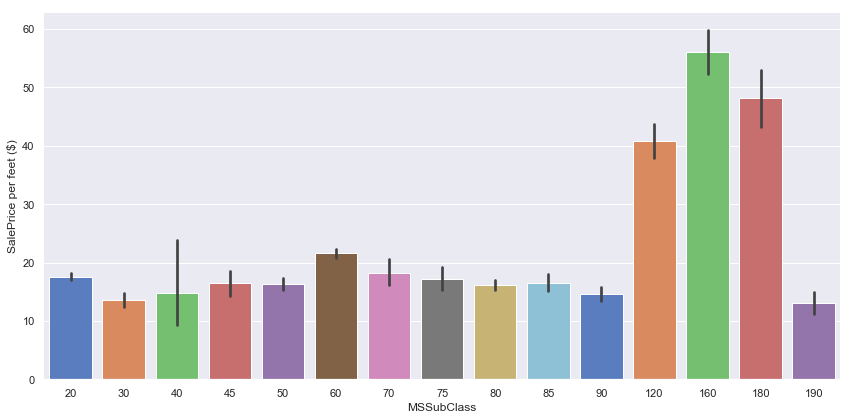

In [17]:
plt.figure(figsize=(7, 12))
class_price_plt = sns.factorplot(data=train_df,
                                 x='MSSubClass',
                                 y='SalePrice_per_feet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
class_price_plt.despine(left=True)
class_price_plt.set_ylabels('SalePrice per feet ($)')

plt.show()

Among all building classes, the first three most expensive classes are "2-STORY PUD - 1946 & NEWER", "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER" and "1-STORY PUD (Planned Unit Development) - 1946 & NEWER".

"SalePrice_per_feet" vs. "MSZoning"

<Figure size 504x864 with 0 Axes>

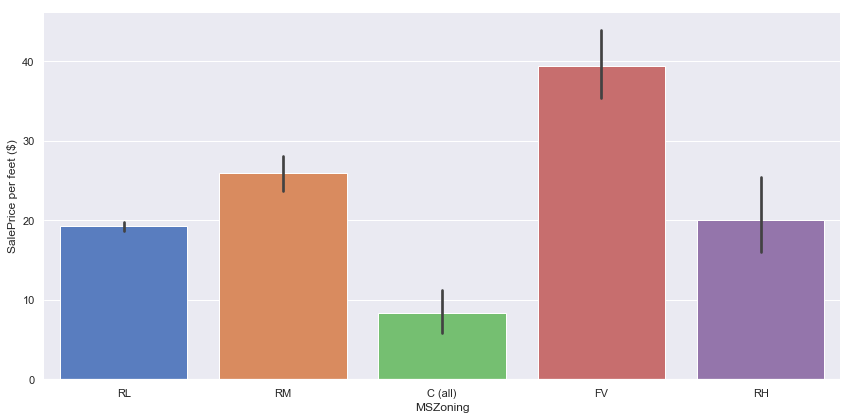

In [18]:
plt.figure(figsize=(7, 12))
zonecls_price_plt = sns.factorplot(data=train_df,
                                 x='MSZoning',
                                 y='SalePrice_per_feet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
zonecls_price_plt.despine(left=True)
zonecls_price_plt.set_ylabels('SalePrice per feet ($)')

plt.show()

The graph above studies the sale price per feet in terms of general zoning classification. Among these 5 zoning classes, the sale price per feet of "Floating Village Residential (FV)" is the most expensive, the zoning classes which are less expensive are "Residential Medium Density (RM)", "Residential High Density (RH)" and "Residential Low Density (RL)", the sale price per feet of "Commercial (C)" is the cheapest among the 5 classes.

Considering the construction's difficulty and their rarity, we can obviously understand why the sale price per feet of "Floating Village Residential (FV)" is the most expensive. However, there are less restrictions on the "Commercial" class, so it's the cheapest class.

"SalePrice_per_feet" vs. "LotShape"

<Figure size 504x864 with 0 Axes>

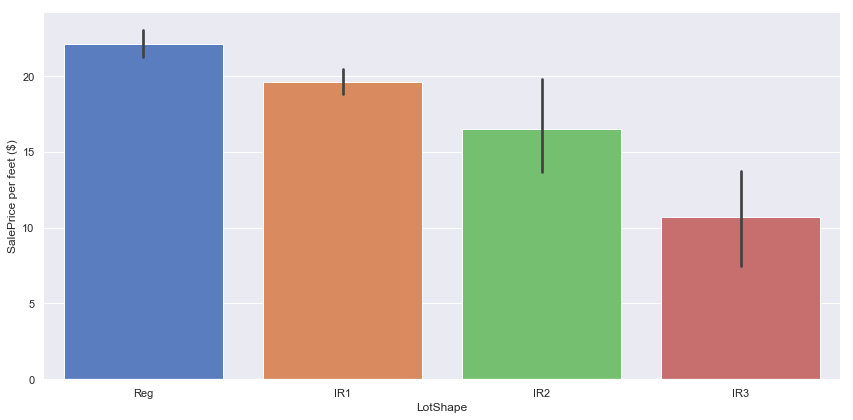

In [19]:
plt.figure(figsize=(7, 12))
lotshape_price_plt = sns.factorplot(data=train_df,
                                 x='LotShape',
                                 y='SalePrice_per_feet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
lotshape_price_plt.despine(left=True)
lotshape_price_plt.set_ylabels('SalePrice per feet ($)')

plt.show()

The relationship between General shape of property (LotShape) and the sale price per feet is easily to understand: people usually like regular shape (Reg) of property, since it's simple for the overall arrangement and more confortable for living.

"SalePrice_per_feet" vs. "Utilities"

<Figure size 504x864 with 0 Axes>

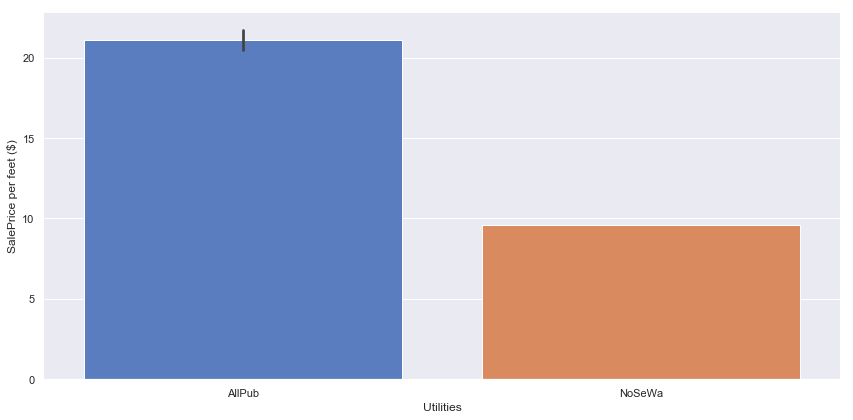

In [20]:
plt.figure(figsize=(7, 12))
utility_price_plt = sns.factorplot(data=train_df,
                                 x='Utilities',
                                 y='SalePrice_per_feet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
utility_price_plt.despine(left=True)
utility_price_plt.set_ylabels('SalePrice per feet ($)')

plt.show()

The result of this plot is interesting: we all know the more complete utilities are, the more expensive per feet is. Except this point, we also get the price per feet of a property whose all public utilities are available is double of the feet-price of a property that only electricity and gas are available.

"SalePrice_per_feet" vs. "LotConfig"

<Figure size 504x864 with 0 Axes>

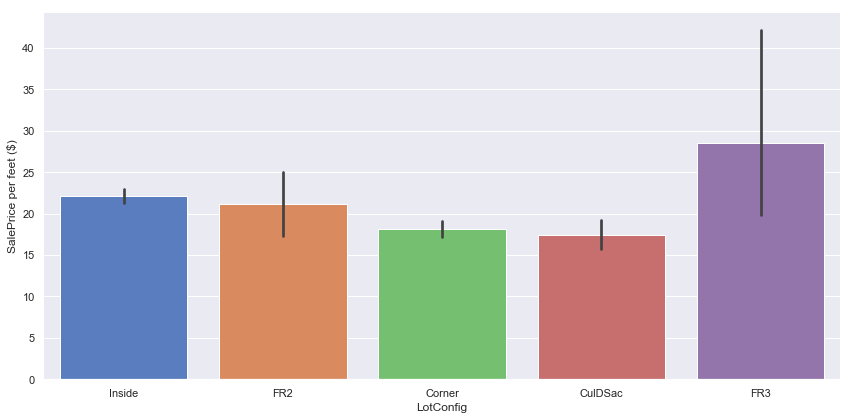

In [21]:
plt.figure(figsize=(7, 12))
lotconfig_price_plt = sns.factorplot(data=train_df,
                                     x='LotConfig',
                                     y='SalePrice_per_feet',
                                     size=6,
                                     kind='bar',
                                     palette='muted',
                                     aspect=2)
lotconfig_price_plt.despine(left=True)
lotconfig_price_plt.set_ylabels('SalePrice per feet ($)')

plt.show()

Considering the lightness, the ventilation and the view, the lot with "Frontage on 3 sides of property" is the best, so its price per feet is the most expensive among the 5 configurations. On the contrary, the lot which is located as a Cul-de-sac, its price per feet is the cheapest.

"SalePrice_per_feet" vs. "OverallQual"

<Figure size 504x864 with 0 Axes>

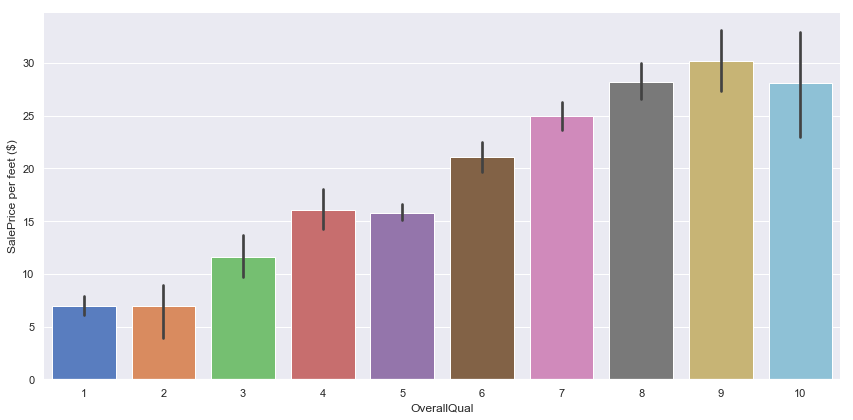

In [22]:
plt.figure(figsize=(7, 12))
overallQual_price_plt = sns.factorplot(data=train_df,
                                    x='OverallQual',
                                    y='SalePrice_per_feet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
overallQual_price_plt.despine(left=True)
overallQual_price_plt.set_ylabels('SalePrice per feet ($)')
# neighbor_price_plt.set_xticklabels(rotation=20)

plt.show()

TODO

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""

"SalePrice_per_feet" vs. ""